In [1]:
import pandas as pd
import numpy as np
import math
import scipy.special as sps
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
#Graphical Model
Image(url= "graphical.jpg")

In [3]:
#Factor Graph
Image(url= "factor.jpg")

In [4]:
#derivation of full joint distribution and individual factors
Image(url= "full_joint.jpg")

In [5]:
#q(A)
Image(url= "conditional_1.jpg")

In [6]:
#q(R)
Image(url= "conditional_2.jpg")

In [7]:
nu = 0.4
beta = 100
P = 1.2
T = 1000
x_0 = 1.0
x_1 = -6.0
E_A = -100.0
E_A2 = E_A*E_A
E_invR = 100.0

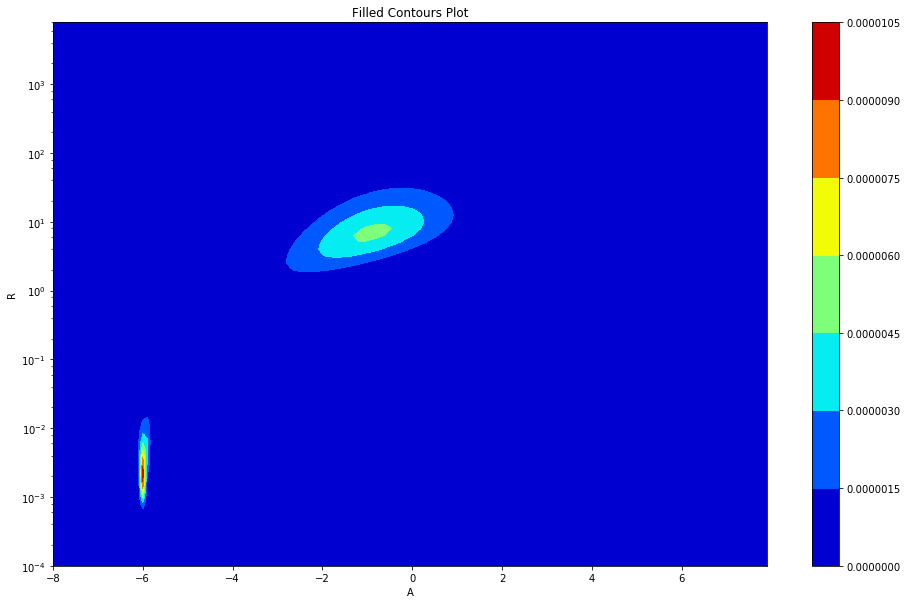

In [8]:
#Contour Plot
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-8.,8.,0.1)
y = np.arange(-4.,4.,0.1)
y = np.power(10.,y)
A, R = np.meshgrid(x,y)
Z = np.exp(-0.5*x_1*x_1/R + x_0*x_1*A/R - 0.5*x_0*x_0*A*A/R - 0.5*np.log(2*np.pi*R))*np.exp(-0.5*A*A/P - 0.5*np.log(np.abs(2*np.pi*P)))*np.exp(-(nu+1)*np.log(R) - nu/(beta*R) - sps.gamma(nu) + nu*np.log(nu/beta))
plt.figure(figsize=(16,10))
cp = plt.contourf(A, R, Z, cmap=plt.cm.jet)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('A')
plt.yscale('log')
plt.ylabel('R')
plt.show()

In [9]:
#Implementation of EM algorithm to find MAP estimates of A and R
for t in range(2,T):
    sig = 1/(1/P + x_0*x_0*E_invR)
    mu = sig*x_0*x_1*E_invR
    E_A = mu
    E_A2 = mu*mu + sig
    a = nu + 0.5
    b = 0.5*(x_1*x_1 - 2*x_1*x_0*E_A + x_0*x_0*E_A2) + nu/beta
    E_invR = a/b

In [10]:
E_A

-0.3704347574553939

In [11]:
E_invR

0.05483471954102366

In [12]:
nu = 0.4
beta = 100
P = 1.2
x_0 = 1.0
x_1 = -6.0
T = 1000
R = np.zeros((1,1000))
A = np.zeros((1,1000))

In [13]:
A[0][0] = -6
R[0][0] = 0.00001

In [14]:
#implementation of ICM
for t in range(1,T):
    sig = 1/(1/P + np.power(x_0,2)*(1.0/R[0][t-1]))
    mu = sig*x_0*x_1*(1/R[0][t-1])
    A[0][t] = math.sqrt(sig)*np.random.normal() + mu;
    b = 0.5*(np.power(x_1,2) - 2*x_1*x_0*A[0][t] + np.power(x_0,2)*np.power(A[0][t],2)) + nu/beta
    R[0][t] = 1/(np.random.gamma(nu+0.5, 1/b));

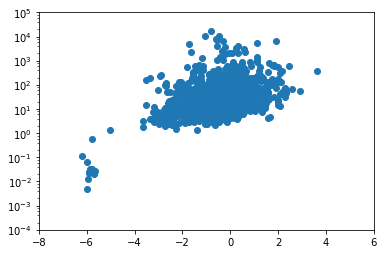

In [15]:
from matplotlib import pyplot
%matplotlib inline
import math
pyplot.scatter(A,R)

pyplot.yscale('log')
pyplot.xlim([-8,6])
pyplot.ylim([0.0001,100000])
pyplot.show()